#####Submission History:
* BEN Oct-24-2015: initial submission, project01 for Udacity Data Analyst Nanodegree
* BEN Oct-25-2015: clarify sample vs population statistics in hypotheses in question two

#Statistics: The Science of Decisions Project Instructions

##Background Information 

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

##Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

1.What is our independent variable? What is our dependent variable?
  * BEN Oct-24-2015: The independent variable is the condition of the words: congruent or incongruent. The dependent variable is the time it took participants to say out loud the color of the printed words' ink.


2.What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
 * BEN Oct-24-2015: An appropriate null hypothesis would be that between the congruent and incongruent lists, there is no difference in the average time it takes to name the ink colors. An appropriate alternative hypothesis would be that there *will* be a difference in the time it takes to name the ink colors when reading the congruent or incongruent lists. This experiment leverages within-subject design (participants record times for **both** conditions and the word lists for each condition are equally-sized), allowing us to use a t-test for dependent paired samples. Our alternative hypothesis does not state which condition is hypothesized to have a higher average time, and so we can use a two-tailed, paired sample t-test.
 
 H0: X-bar (congruent) = X-bar (incongruent)
 
 HA: X-bar (congruent) != X-bar (incongruent)
 
 * **BEN Oct-25-2015: An appropriate null hypothesis would be that the population average time for a congruent list is the same as the population average time for an incongruent list. An appropriate alternative hypotheses would be that there *is* a difference between the population average time for a congruent list vs population average time for an incongruent list. We will use sample statistics (calculated from our experiment on the 24 participants) to make statistical inferences on the population parameters that we hypothesize on.** This experiment leverages within-subject design (participants record times for **both** conditions and the word lists for each condition are equally-sized), allowing us to use a t-test for dependent paired samples. Our alternative hypothesis does not state which condition is hypothesized to have a higher population average time, and so we can use a two-tailed, paired sample t-test.
 
 H0: Congruent population mean = Incongruent population mean
 
 HA: Congruent population mean != Incongruent population mean


*Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.*

In [1]:
import pandas as pd
path = r'~/Downloads/stroopdata.csv'
dataFrame = pd.read_csv(path)
dataFrame

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


3.Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [7]:
dataFrame.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


 * BEN Oct-24-2015: The sample size for each condition is 24. The mean for the Congruent sample is 14.05 seconds. The mean for the Incongruent sample is 22.02 seconds. The standard deviations are 3.56 and 4.79 seconds for the congruent and incongruent samples, respectively.

4.Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
 * BEN Oct-24-2015: The first figure below plots each of the 24 Stroop task participants' times on both the Congruent (x-axis) and Incongruent (y-axis) lists. Notice that none of the 24 participants' times were identical for both lists. Notice also that the Incongruent times for each participant were higher than their time recorded for the Congruent list. This characteristic of the sample is visualized by the Congruent vs Incongruent scatter plot, as well as the second figure below: a box plot of the difference between the Incongruent and Congruent times for each of our 24 participants. Note that none of the differences (Incongurent minus Congruent) were below zero.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


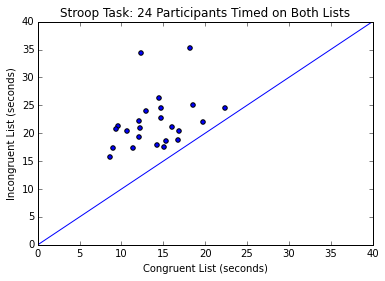

In [32]:
%pylab inline
import matplotlib.pyplot as plt

plt.scatter(x=dataFrame['Congruent'], y=dataFrame['Incongruent'])
plt.xlabel("Congruent List (seconds)")
plt.ylabel("Incongruent List (seconds)")
plt.title("Stroop Task: 24 Participants Timed on Both Lists")
plt.axis([0,40,0,40])
plt.plot([0,40],[0,40])
plt.show()

####Box Plot of subjects' Incongruent time minus Congruent time:

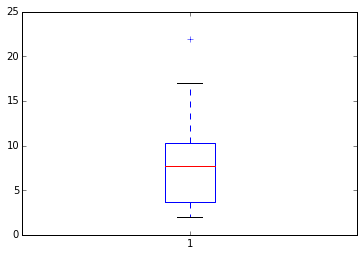

In [31]:
dataFrame['Difference'] = dataFrame.Incongruent - dataFrame.Congruent
box = plt.boxplot(dataFrame['Difference'])


5.Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [33]:
dataFrame.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


 * BEN Oct-24-2015: original submission. *BEN Oct-25-2015: clarified H0 and HA
 
 **H0: Congruent population mean = Incongruent population mean**
 
 **HA: Congruent population mean != Incongruent population mean**
   
   Sample Differences Description (Incongruent - Congruent): n=24, mean=7.96, standard deviation=4.86, standard error=0.99

   Paired-Sample t-Test: t(23) = 8.02, p=1.06E-15, two-tailed
   
   Confidence Interval on mean difference: 95% CI = (5.92,10.01)
   
   **For a two-tailed, paired-sample t-test at an alpha level of 0.05, we can reject the null hypothesis. The paired-sample difference's extremely low p-value (1.06E-15) suggests it is very likely that the condition of the word list (congruent or incongruent) has a statistically signficant effect on the population's time taken to finish each list. The high t-statistic for the sample difference (incongruent minus congruent) suggests that statististically, it takes longer for the population to complete an incongruent list. This aligns with both the intuition and past experience of the submittor. **

##Resources

 * Statistical concept and general guidance provided by Udacity nanodegree support course: "Statistics". Instructed by Dr. Sean Laraway, Dr. Ronald Rogers, and Katie Kormanik.

 * Sample statistics displayed with Pandas. Python DataFrame overview provided by the personal website of Greg Reda at http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

 * Project compiled with Markdown for Python Notebooks. Reference: https://help.github.com/articles/markdown-basics/

 * Visualizations created with matplotlib. References: http://matplotlib.org/users/pyplot_tutorial.html and http://matplotlib.org/api/pyplot_api.html

 * p-Value calculated using Wolfram Alpha. Specifically: http://www.wolframalpha.com/input/?i=z+%3D+8.02&a=*C.z-_*ShortZScore-